In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from scipy.stats import ttest_ind
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from scipy.stats import kurtosis, skew
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

### Carregamento e pré-processamento dos dados;

In [6]:
breast_cancer_dict = load_breast_cancer()
breast_cancer_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
breast_cancer_df = pd.DataFrame(breast_cancer_dict['data'], columns=breast_cancer_dict['feature_names'])
breast_cancer_df['target'] = breast_cancer_dict['target']
target_names = dict(enumerate(breast_cancer_dict.target_names)) 
breast_cancer_df['target_name'] = breast_cancer_df['target'].map(target_names)

breast_cancer_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [8]:
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
print(breast_cancer_df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
target_name                0
dtype: int64


### Treinamento e avaliação de modelos de classificação usando o algoritmo K-Nearest Neighbors (KNN)

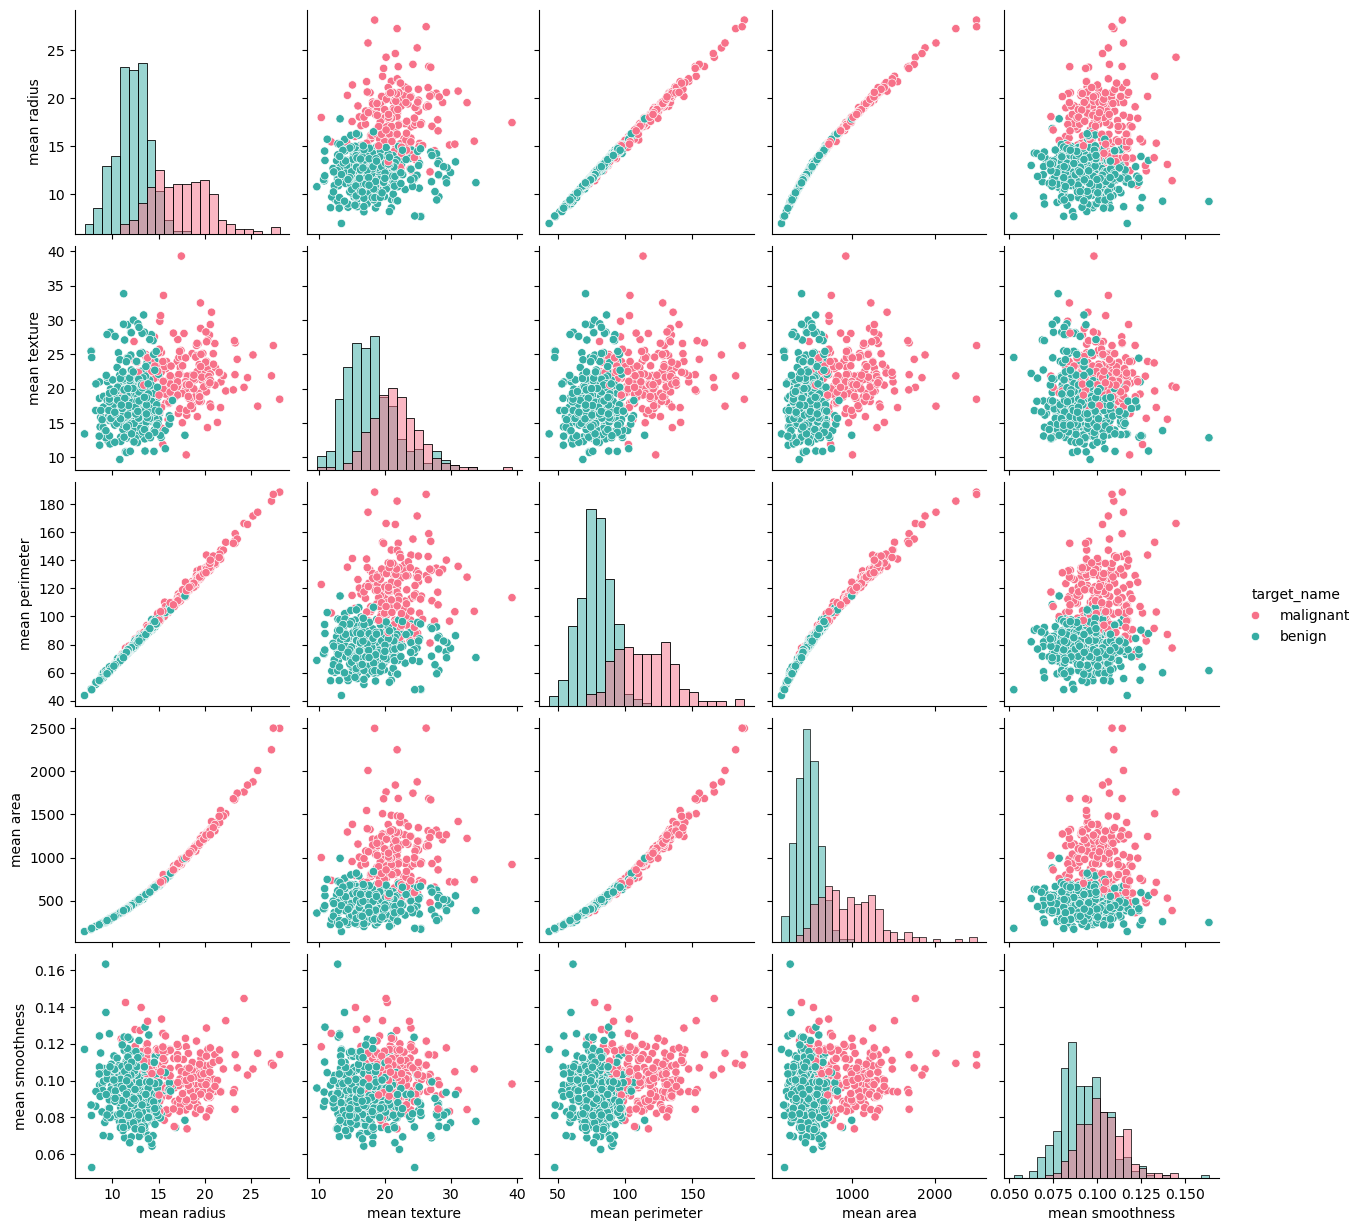

In [10]:
mean_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

sns.pairplot(breast_cancer_df[mean_features + ['target_name']], hue='target_name', diag_kind='hist', palette='husl')

In [11]:
testt_features = []
df = breast_cancer_df.copy()
target_maligno = df[df['target'] == 0]  
target_benigno = df[df['target'] == 1]  


for col in df.drop(['target', 'target_name'], axis=1).columns:
    stat, p_valor = ttest_ind(target_maligno[col], target_benigno[col])
    testt_features.append({'feature': col, 'p-valor': p_valor})


df_resultados_testt = pd.DataFrame(testt_features)
df_resultados_testt = df_resultados_testt.sort_values(by='p-valor')


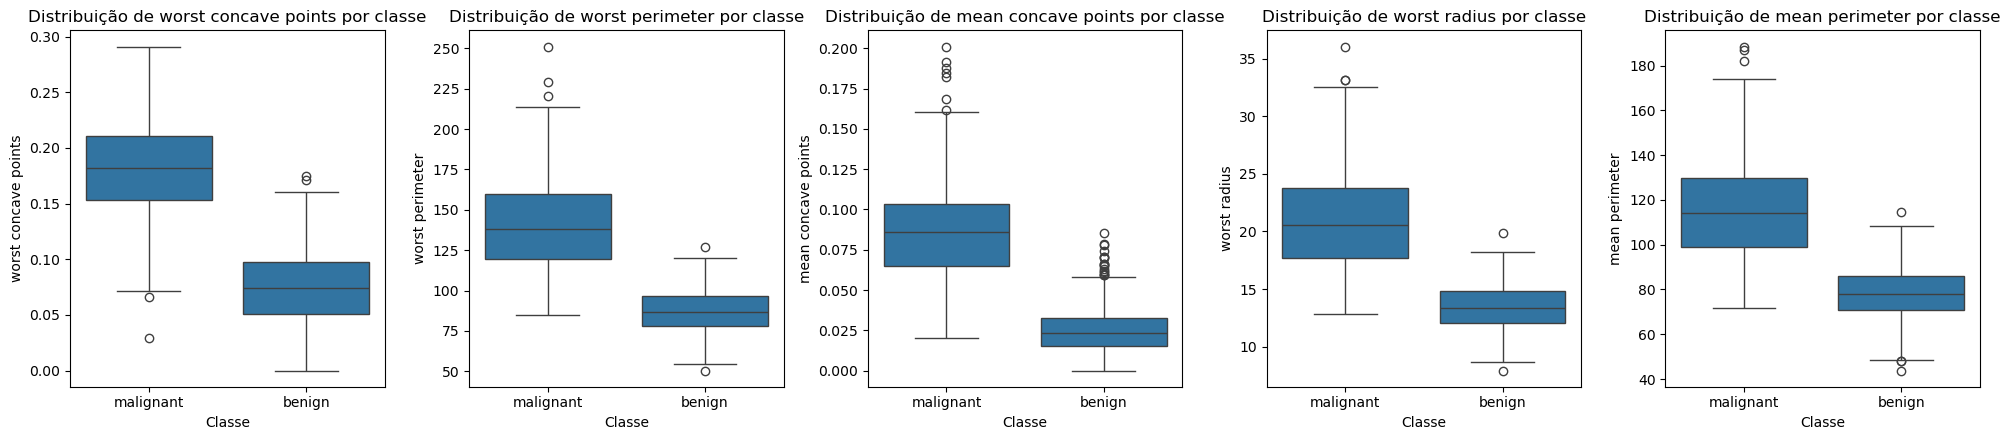

In [12]:
features_relevantes = df_resultados_testt['feature'].head(5).tolist()

fig, axs = plt.subplots(1, 5, figsize=(20, 4.5))  
for i, ax in enumerate(axs):
    sns.boxplot(x='target_name', y=features_relevantes[i], data=df, ax=ax)
    ax.set_title(f'Distribuição de {features_relevantes[i]} por classe')
    ax.set_xlabel('Classe')
    ax.set_ylabel(features_relevantes[i])

plt.tight_layout()
plt.show()

In [13]:
X = breast_cancer_df[features_relevantes]
y = breast_cancer_df['target']


random_seed = 42
np.random.seed(random_seed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=random_seed)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print(f"Acurácia: {accuracy_score(y_test, y_pred) * 100:.1f}%")

Acurácia: 96.5%


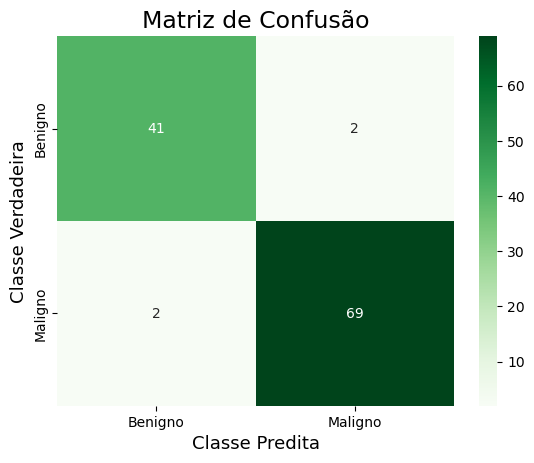

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [15]:

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, 
            annot=True,
            fmt='g',
            cmap='Greens',
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])

plt.ylabel('Classe Verdadeira', fontsize=13)
plt.xlabel('Classe Predita', fontsize=13)
plt.title('Matriz de Confusão', fontsize=17)
plt.show()

print(classification_report(y_test, y_pred))

### Geração e uso de dados sintéticos com ruído para simular aumento de base

In [16]:

media, desvio_padrao = 0, 0.1
noise = np.random.normal(loc=media, scale=desvio_padrao, size=X_train_scaled.shape)
X_train_noised = X_train_scaled + noise


In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_noised, y_train)

y_pred = knn.predict(X_test_scaled)


print(f"Acurácia com ruído nos dados de treino: {accuracy_score(y_test, y_pred) * 100:.1f}%")

Acurácia com ruído nos dados de treino: 95.6%


In [18]:
print(y_train.dtype)
print(np.unique(y_train))


int64
[0 1]


### Análise da performance do modelo variando o parâmetro K

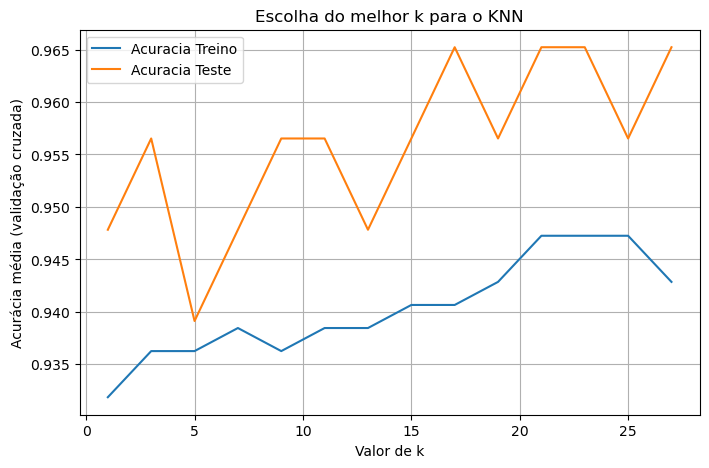

In [19]:

k_array = [k for k in range(1, 28, 2)]
accuracy_train = {}
accuracy_test = {}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_array:
  knn = KNeighborsClassifier(n_neighbors=k)
  train_scores = cross_val_score(knn, X_train_noised, y_train, cv=kf, scoring='accuracy')
  accuracy_train[k] = train_scores.mean()

  test_scores = cross_val_score(knn, X_test_scaled, y_test, cv=kf, scoring='accuracy')
  accuracy_test[k] = test_scores.mean()



plt.figure(figsize=(8, 5))
plt.plot(k_array, accuracy_train.values(), label="Acuracia Treino")
plt.plot(k_array, accuracy_test.values(), label="Acuracia Teste")
plt.legend()
plt.xlabel('Valor de k')
plt.ylabel('Acurácia média (validação cruzada)')
plt.title('Escolha do melhor k para o KNN')
plt.grid(True)
plt.show()


## Diferença conceitual entre regressão e classificação

*Regressão e Classificação são dois tipos fundamentais de problemas no aprendizado de máquina supervisionado, e a escolha entre qual usar depende do tipo de variável que se deseja prever e no tipo de saída que se deseja prever.*<br>
 *A classificação separa e categoriza um conjuto de dados em classes ou rótulos predefinidos, reconhecendo padrões nos atributos das amostras para determinar em qual categoria as novas instância iram pertencer.Exemplos típicos de problemas de classificação incluem identificar se um e-mail é spam ou não, diagnosticar se uma doença é maligna ou benigna, ou classificar imagens entre gato, cachorro ou pássaro. Alguns algoritmos comuns de classificação são: Árvores de Decisão, Floresta Aleatória (Random Forest) e K-Vizinhos Mais Próximos (K-NN).*<br>
 *Algoritmos de regressão  buscam prever um valor númerico contínuo com base em uma ou mais variáveis de entrada, o modelo  estabele uma relação entre variáveis independentes e uma variável dependente, realizando uma estimativa baseada em uma função de mapeamento. Exemplos de problemas de regressão incluem prever o preço de um imóvel, o peso de uma pessoa, a probabilidade de chover ou o volume de vendas de uma loja no próximo ano. Alguns modelos de regressão bastante utilizados são: Regressão Linear Simples, Regressão Linear Múltipla e Regressão Polinomial.*<br>
*A principal diferença entre regressão e classificação é que, enquanto a regressão busca prever um valor numérico específico, a classificação tem como objetivo identificar a qual classe ou categoria um dado pertence.*

### Construção e avaliação de um modelo de Regressão Linear

In [20]:
random_seed = 42
np.random.seed(random_seed)


df = breast_cancer_df.drop(columns=['target', 'target_name'])
correlacao = df.corr()['mean area'].sort_values(ascending=False)

X = df[correlacao.index].drop(columns=['mean area'])
y = df['mean area']


modelo = LinearRegression()
rfe = RFE(modelo, n_features_to_select=5)
rfe.fit(X, y)
X_final = X.loc[:, rfe.support_]


X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.20, random_state=random_seed)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


modelo.fit(X_train_scaled, y_train)
y_pred = modelo.predict(X_test_scaled)


print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("Coeficiente angular (a):", modelo.coef_)
print("Intercepto (b):", modelo.intercept_)


MSE: 14150.765944232298
R²: 0.8772822215602237
Coeficiente angular (a): [ 355.64861407  -55.8096006   -36.89511213   57.96887786 -162.9394575 ]
Intercepto (b): 654.3775824175814


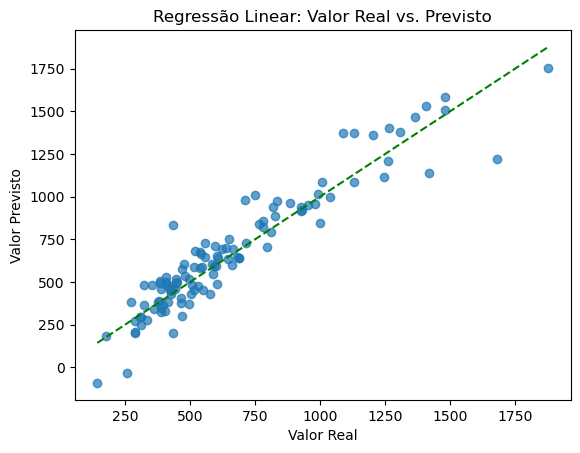

In [21]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Regressão Linear: Valor Real vs. Previsto")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--') 
plt.show()


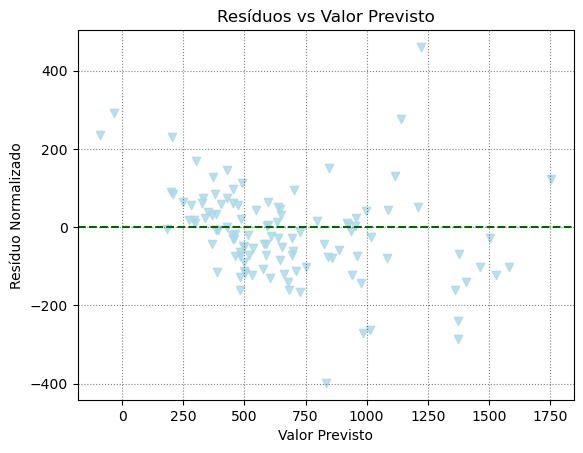

In [22]:
residuos = y_test - y_pred
residuos_normalizados = residuos / np.std(residuos)

plt.scatter(y_pred, residuos, marker='v', alpha=0.8, color = 'lightblue')
plt.axhline(0, color='darkgreen', linestyle='--')
plt.grid(ls=':', color="black", alpha=0.5)
plt.xlabel("Valor Previsto")
plt.ylabel("Resíduo Normalizado")
plt.title("Resíduos vs Valor Previsto")
plt.show()


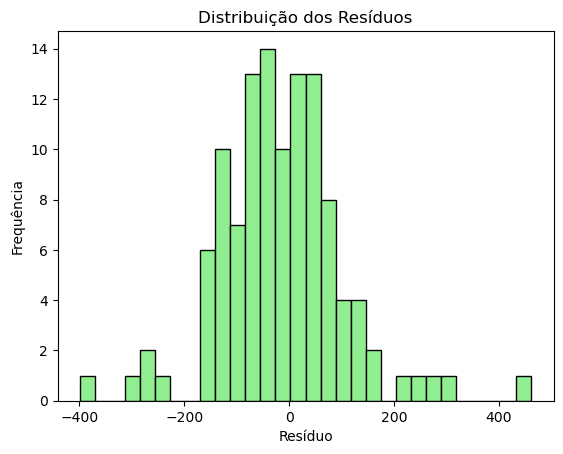

Média:  -16.20136186919926
Variância:  14011.186966645777
Assimetria:  0.43237214689786574
Curtose:  2.7423126790605497


In [23]:
plt.hist(residuos, bins=30, edgecolor='k', color= 'lightgreen')
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduo")
plt.ylabel("Frequência")
plt.show()



print("Média: ", residuos.mean())
print("Variância: ", residuos.var()) 
print("Assimetria: ", residuos.skew())
print("Curtose: ", residuos.kurtosis())
